<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


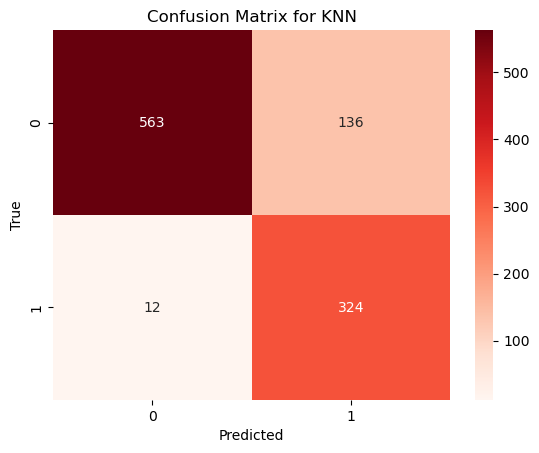

KNN Accuracy: 0.8570048309178744


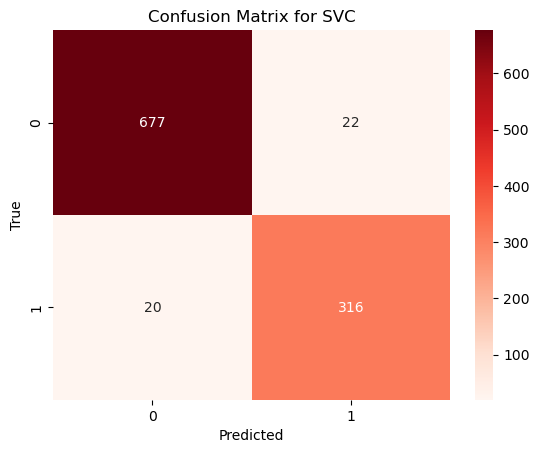

SVC Accuracy: 0.9594202898550724


In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix  # Corrected this line

# Load the data
data = pd.read_csv("emails.csv")

# Data exploration
data.info()
data.head()
data.tail()
data.shape
data.describe()
data.isnull().sum()
data.dtypes

# Define features and labels
x = data.iloc[:, 1:3001]
y = data.iloc[:, -1]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Evaluate KNN model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')  # Use 'd' for integer annotation
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

print("KNN Accuracy:", accuracy_score(y_test, y_pred))

# Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=0)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

# Evaluate SVC model
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Reds')  # Use 'd' for integer annotation
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVC')
plt.show()

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
